# Final Project: Real Estate Price Prediction

Python libraries for Data Science: Numpy, Matplotlib, Scikit-learn

**Project Plan**
* [General information](#info)
* [Preparation](#prep)
* [EDA](#eda)
* [Data Processing](#processing)
* [Features Engineering](#features)
* [Model](#model)

---

## General information <a class='anchor' id='info'>

**Files:**
    
    - train.csv
    - test.csv
    
**Task:** 

    Using the data from train.csv, build a model to predict the price of real estate. Using the obtained model to predict the prices of falts from the test.csv file.
    
**Target variable:** 

    Price
    
**Main metrics:**

    R2 - determination coefficient (sklearn.metrics.r2_score)
    
**Supporting metrics:**

    MSE - mean square average error (sklearn.metrics.mean_squared_error)

---

## Preparation <a class='anchor' id='prep'>

**Connection of libraries and scripts**

In [54]:
# Data Upload

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats

# Data Processing

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Building the Model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

**Reduce memory usage (function)**

In [2]:
def optimizing_df(df):
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')

    return df

**Data upload**

In [3]:
train_df = pd.read_csv('real-estate-price-prediction-moscow/train.csv')
test_df = pd.read_csv('real-estate-price-prediction-moscow/test.csv')
print('Data upload is done')

Data upload is done


In [4]:
# Get info about both dataframes

print(train_df.shape[0], train_df.shape[1])
print(test_df.shape[0], test_df.shape[1])

10000 20
5000 19


In [5]:
# Get the first 10 rows of train_df

train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [6]:
# Get the first 10 rows of test_df

test_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
5,868,38,3.0,87.139994,53.180419,10.0,4,23.0,2011,0.060753,B,B,15,2787,2,520.0,0,7,B
6,672,62,1.0,46.269456,22.820239,11.0,8,17.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A
7,2471,2,2.0,48.172969,29.924204,6.0,4,9.0,1974,0.000000,B,B,33,7425,1,NaN,2,5,B
8,4510,1,1.0,43.153761,21.017596,9.0,10,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B
9,8354,62,2.0,62.593787,59.786844,10.0,1,16.0,1981,0.002212,B,B,39,7614,3,NaN,1,5,A


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


**Memory usage optimization**

Using **float64** format for number of Rooms and HouseFloor might be wrong, let's change it to **int64**

In [9]:
# Rooms

train_df['Rooms'] = train_df['Rooms'].astype('int64')
test_df['Rooms'] = test_df['Rooms'].astype('int64')

# House Floor

train_df['HouseFloor'] = train_df['HouseFloor'].astype('int64')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int64')

We can apply our function optimizing_df as well

In [10]:
train_df = optimizing_df(train_df)
test_df = optimizing_df(test_df)

Call the info now on both of the dataframes

In [11]:
train_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null uint16
DistrictId       10000 non-null uint8
Rooms            10000 non-null uint8
Square           10000 non-null float32
LifeSquare       7887 non-null float32
KitchenSquare    10000 non-null float32
Floor            10000 non-null uint8
HouseFloor       10000 non-null uint8
HouseYear        10000 non-null uint32
Ecology_1        10000 non-null float32
Ecology_2        10000 non-null category
Ecology_3        10000 non-null category
Social_1         10000 non-null uint8
Social_2         10000 non-null uint16
Social_3         10000 non-null uint8
Healthcare_1     5202 non-null float32
Helthcare_2      10000 non-null uint8
Shops_1          10000 non-null uint8
Shops_2          10000 non-null category
Price            10000 non-null float32
dtypes: category(3), float32(6), uint16(2), uint32(1), uint8(8)
memory usage: 420.7 KB


In [12]:
test_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null uint16
DistrictId       5000 non-null uint8
Rooms            5000 non-null uint8
Square           5000 non-null float32
LifeSquare       3959 non-null float32
KitchenSquare    5000 non-null float32
Floor            5000 non-null uint8
HouseFloor       5000 non-null uint8
HouseYear        5000 non-null uint16
Ecology_1        5000 non-null float32
Ecology_2        5000 non-null category
Ecology_3        5000 non-null category
Social_1         5000 non-null uint8
Social_2         5000 non-null uint16
Social_3         5000 non-null uint8
Healthcare_1     2623 non-null float32
Helthcare_2      5000 non-null uint8
Shops_1          5000 non-null uint8
Shops_2          5000 non-null category
dtypes: category(3), float32(5), uint16(3), uint8(8)
memory usage: 181.4 KB


---

## EDA <a class='anchor' id='eda'>

**Exploratory Data Analysis**

In [13]:
# Concat both of the dfs and drop the index

data_df = pd.concat((train_df, test_df), sort = False).reset_index(drop = True)

# Drop the Price column

data_df.drop(['Price'], axis = 1, inplace = True)

# Check the shape of data_df

data_df.shape

(15000, 19)

In [14]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,15000.0,8393.136933,4850.111673,0.000000,4188.750000,8378.500000,12594.250000,1.679800e+04
DistrictId,15000.0,50.693600,43.786257,0.000000,20.000000,37.000000,75.000000,2.120000e+02
Rooms,15000.0,1.897000,0.839229,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,15000.0,56.360352,20.423912,1.136859,41.814370,52.645758,66.036606,6.410652e+02
LifeSquare,11846.0,36.851791,71.120186,0.333490,22.896130,32.822811,45.144627,7.480592e+03
KitchenSquare,15000.0,6.174467,24.016979,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,15000.0,8.561800,5.323113,1.000000,4.000000,7.000000,12.000000,7.800000e+01
HouseFloor,15000.0,12.606600,6.780165,0.000000,9.000000,12.000000,17.000000,1.170000e+02
HouseYear,15000.0,3321.575067,163707.780381,1908.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,15000.0,0.119196,0.119371,0.000000,0.017647,0.075424,0.195781,5.218670e-01


**Rooms**

The first stop, which has to be fixed, is the **Rooms** column partly due to the min and max values

In [15]:
data_df.loc[data_df['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2004,5927,57,10,59.056976,36.223072,10.0,22,22,2002,0.090799,B,B,74,19083,2,NaN,5,15,B
2728,14865,9,10,60.871265,38.420681,10.0,3,2,1994,0.161532,B,B,25,5648,1,30.0,2,4,B
6088,8491,1,19,42.006046,21.779287,7.0,17,17,2014,0.007122,B,B,1,264,0,NaN,0,1,B
11981,1435,111,17,52.866108,32.528343,8.0,15,17,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [16]:
data_df.loc[data_df['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2194,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,NaN,3,9,B
3780,7317,27,0,41.790882,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
5894,770,28,0,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B
6401,9443,27,0,87.762619,85.125473,0.0,5,15,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
7644,7917,27,0,212.932358,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B
7929,456,6,0,81.491447,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
9767,12638,27,0,138.427689,136.215500,0.0,4,3,2016,0.075424,B,B,11,3097,0,NaN,0,0,B
9869,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
10961,3343,58,0,116.824203,113.692421,0.0,3,3,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
14179,10729,27,0,76.345154,42.820797,12.0,14,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [17]:
# Define function to fix these values (and the column as well)

def df_rooms(df):
    
    info_by_district_id = df.groupby(['DistrictId', 'HouseYear'], as_index = False).agg(
        {'Rooms': 'sum', 'Square': 'sum'}).rename(
        columns={'Rooms': 'sum_roos_dr', 'Square': 'sum_square_dr'})

    info_by_district_id['mean_square_per_room_in_dr'] = info_by_district_id['sum_square_dr'] \
        / info_by_district_id['sum_roos_dr']
    info_by_district_id.drop(
        ['sum_square_dr', 'sum_roos_dr'], axis = 1, inplace = True)

    df = pd.merge(df, info_by_district_id, on = [
                  'DistrictId', 'HouseYear'], how = 'left')

    df['mean_square_per_room_in_dr'] = df['mean_square_per_room_in_dr'].fillna(
        df['mean_square_per_room_in_dr'].mean())

    df.loc[df['Rooms'] > 6, 'Rooms'] \
        = (df.loc[df['Rooms'] > 6, 'Square']
           // df.loc[df['Rooms'] > 6, 'mean_square_per_room_in_dr']).astype('int')

    df.loc[df['Rooms'] == 0, 'Rooms'] \
        = (df.loc[df['Rooms'] == 0, 'Square']
           // df.loc[df['Rooms'] == 0, 'mean_square_per_room_in_dr']).astype('int')

    df.loc[df['Rooms'] == 0, 'Rooms'] = 1
    
    return df

**Square**

Let's check the values in this column

In [18]:
# Display the square above 200

data_df[data_df['Square'] > 200].nlargest(20, 'Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
9229,11602,30,2,641.065186,638.163208,10.0,20,19,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B
726,28,9,2,604.705994,NaN,1.0,17,18,1977,0.161532,B,B,25,5648,1,30.0,2,4,B
7010,2307,102,1,409.425171,410.639740,10.0,4,4,2016,0.238617,B,B,26,3889,6,705.0,3,6,B
1906,5548,86,5,275.645294,233.949310,26.0,12,37,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B
10956,4058,27,6,223.453690,104.113556,16.0,2,2,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
14402,1397,76,3,221.138763,118.055344,4.0,32,48,2011,0.000000,B,B,7,1660,39,1786.0,1,5,B
7644,7917,27,0,212.932358,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B
1776,16568,27,4,200.334534,201.627365,25.0,1,2,2013,0.041116,B,B,53,14892,4,NaN,1,4,B


56.3604 20.4232


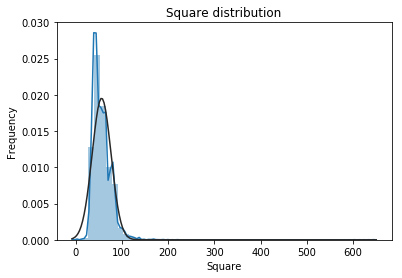

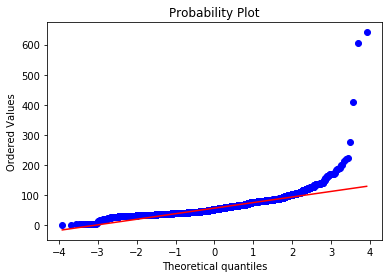

In [19]:
# Maybe, it is better to visualize

sns.distplot(data_df['Square'], fit = norm)

mu, sigma = norm.fit(data_df['Square'])

print(mu, sigma)

plt.ylabel('Frequency')
plt.title('Square distribution')

# QQ-plot

fig = plt.figure()
res = stats.probplot(data_df['Square'], plot = plt)
plt.show()

After the graphs above, it is clear that some values have to be fixed

In [20]:
# Function to change the values, which are above 400

def df_square_m(df):
    
    df.loc[df['Square'] > 400, 'Square'] = df.loc[df['Square'] > 400, 'Square'] / 10
    
    return df

In [21]:
# Function, which can be applied to the whole column

def df_square(df):
    
    info_by_district_id = df.groupby(['DistrictId', 'Rooms', 'HouseYear'], as_index = False).agg(
        {'Square': 'mean'}).rename(
        columns = {'Square': 'mean_square_rooms_dr'})

    df = pd.merge(df, info_by_district_id, on = [
        'DistrictId', 'Rooms', 'HouseYear'], how = 'left')

    df.loc[abs(df['Square'] - df['mean_square_rooms_dr']) > 2 * sigma, 'Square'] \
        = df.loc[abs(df['Square'] - df['mean_square_rooms_dr']) > 2 * sigma, 'Rooms'] \
        * df.loc[abs(df['Square'] - df['mean_square_rooms_dr']) > 2 * sigma, 'mean_square_per_room_in_dr']
    
    return df

In [22]:
# Function to use for LifeSquare column (which is related to Square)

def df_lifesquare(df):
    
    df.loc[df['Square'] < df['LifeSquare'],
          'LifeSquare'] = df.loc[df['Square'] < df['LifeSquare'], 'Square']
    
    return df

# Another one to fill na

def fill_lifesquare(df):
    
    df['LifeSquare'] = df['LifeSquare'].fillna(df['LifeSquare'].mean())
    
    return df

**HouseYear**

In [23]:
# Check the values, where the value of the year is bigger than this year (2020)

data_df[data_df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
8828,11607,147,2,44.791836,28.360394,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B
9163,10814,109,1,37.265072,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B


In [24]:
# Define the function to fix 

def df_houseyear(df):
    
    df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011) / 2) # the average of two years as integer
    df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968 # mistyping
    
    return df

---

## Data Processing <a class='anchor' id='processing'>

**Target variable(price)**

Let's firstly have a look at the distribution of our target variable (**price**)

214139.0 92867.6


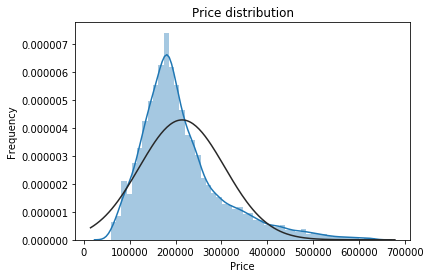

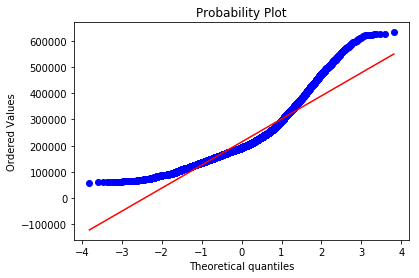

In [26]:
# Normal distribution

sns.distplot(train_df['Price'], fit = norm)

mu, sigma = norm.fit(train_df['Price'])

print(mu, sigma)

plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot

fig = plt.figure()
res = stats.probplot(train_df['Price'], plot = plt)
plt.show()

214139.0 92867.6


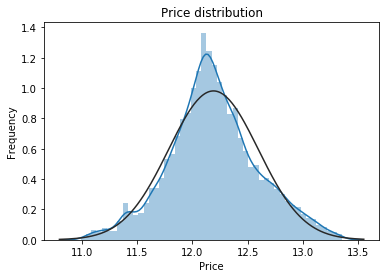

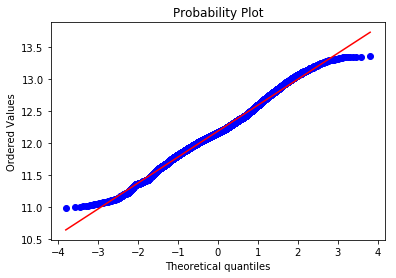

In [27]:
# Log distribution

price_log = np.log1p(train_df['Price'])
sns.distplot(price_log, fit = norm)

mu, sigma = norm.fit(train_df['Price'])

print(mu, sigma)

plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot

fig = plt.figure()
res = stats.probplot(price_log, plot = plt)
plt.show()

**Distribution of HouseYear**

Text(0.5, 1.0, 'Distribution of HouseYear')

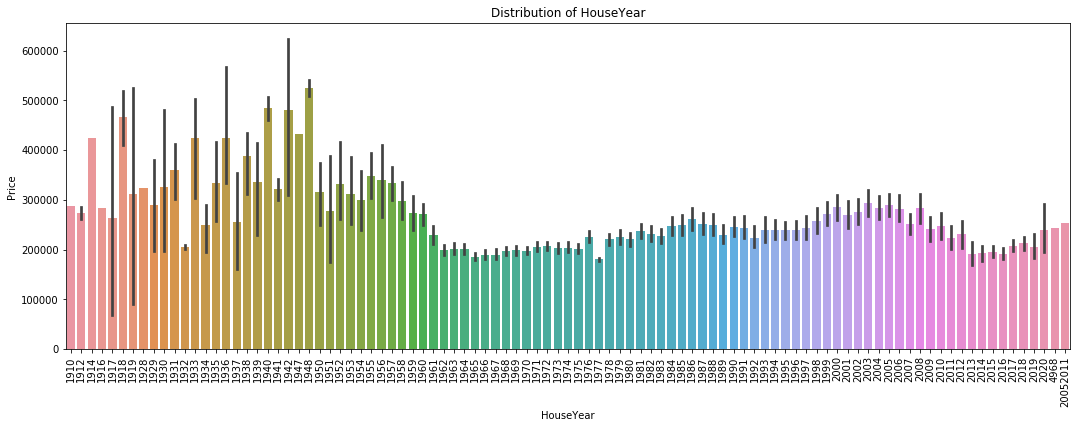

In [29]:
plt.figure(figsize = (18, 6))
sns.barplot(train_df['HouseYear'], train_df['Price'])
plt.xticks(rotation = 90)
plt.title('Distribution of HouseYear')

**Distribution of DistrictId**

Text(0.5, 1.0, 'Distribution of DistrictId')

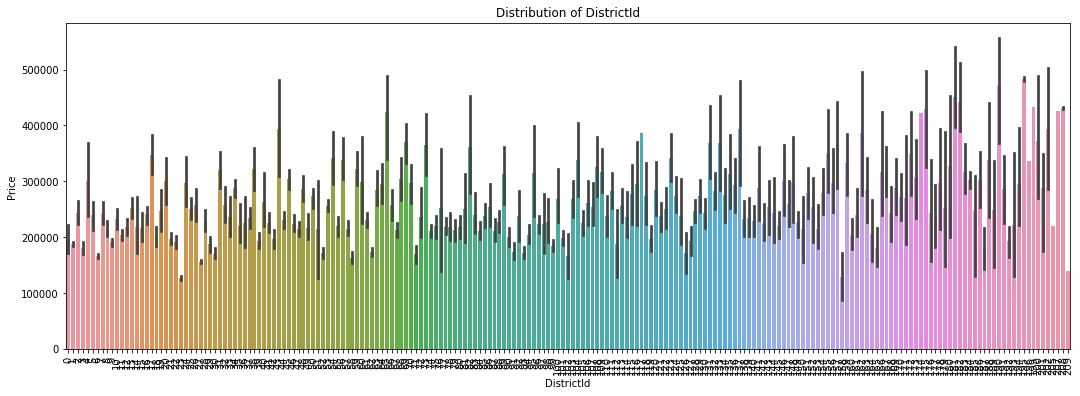

In [30]:
plt.figure(figsize = (18, 6))
sns.barplot(train_df['DistrictId'], train_df['Price'])
plt.xticks(rotation = 90)
plt.title('Distribution of DistrictId')

## Features Engineering <a class='anchor' id='features'>

**Missing data points**

In [31]:
data_df = pd.concat((train_df, test_df), sort = False).reset_index(drop = True)
data_df.drop(['Price'], axis = 1, inplace = True)
print(data_df.shape)

(15000, 19)


In [32]:
data_df_na = (data_df.isnull().sum() / len(data_df)) * 100
data_df_na = data_df_na.drop(
    data_df_na[data_df_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio': data_df_na})
missing_data

,Missing Ratio
Healthcare_1,47.833333
LifeSquare,21.026667


In [33]:
# Define the function to delete the missing data points

def del_missing(df):
    
    df_na = (df.isnull().sum() / len(df)) * 100

    df_na = df_na.drop(
        df_na[df_na == 0].index).sort_values(ascending = False)
    df_na = list(df_na.index)
    df.drop(df_na, axis = 1, inplace = True)
    
    return df

**Data Correlation**

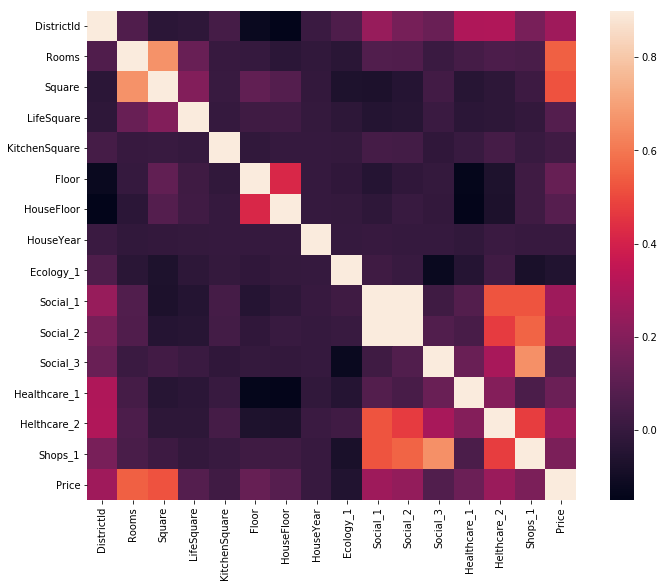

In [35]:
# Plot the correlation matrix (avoid using Id column)

corrmat = train_df.loc[:, train_df.columns != 'Id'].corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.9, square = True)

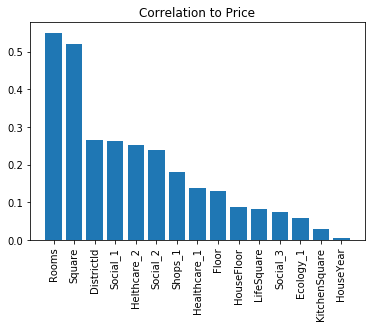

In [36]:
# Plot the correlation to our target variable (price)

corrmat = train_df.loc[:, train_df.columns != 'Id'].corrwith(
    train_df['Price']).abs().sort_values(ascending = False)[1:]
plt.bar(corrmat.index, corrmat.values)
plt.title('Correlation to Price')
plt.xticks(rotation = 'vertical')
plt.show()

**Cluster**

Move forward with the clustering

In [37]:
scaler = MinMaxScaler()

In [38]:
train_cluster = train_df.copy()
train_cluster = df_houseyear(train_cluster)

In [39]:
# Scale

train_cluster_scaled = pd.DataFrame(scaler.fit_transform(
    train_cluster.loc[:, ['HouseYear', 'Price']]), columns = ['HouseYear', 'Price'])

/Users/ilya.ivolgin/miniconda3/envs/day2/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


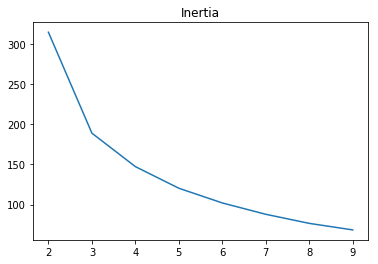

In [40]:
# KMeans

inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters = i, random_state = 100)
    temp_model.fit(train_cluster_scaled)
    temp_inertia = temp_model.inertia_
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)
plt.title('Inertia')

plt.show()

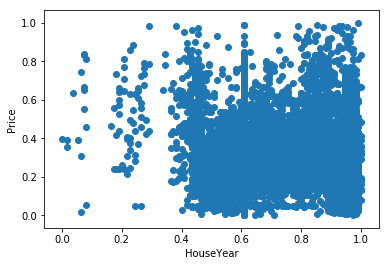

In [41]:
plt.scatter(train_cluster_scaled['HouseYear'], train_cluster_scaled['Price'])
plt.xlabel('HouseYear')
plt.ylabel('Price')
plt.show()

In [42]:
# KMeans-Model with 5 clusters

kmeans_model = KMeans(n_clusters = 5, random_state = 100)

In [43]:
# Define the train labels

train_labels = kmeans_model.fit_predict(train_cluster_scaled)

Text(0.5, 1.0, 'Train data')

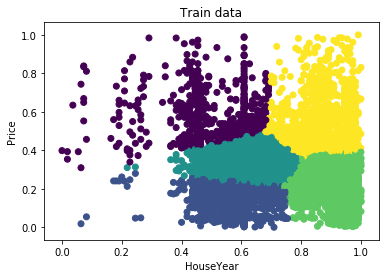

In [44]:
# Plot the result

plt.scatter(train_cluster_scaled['HouseYear'],
            train_cluster_scaled['Price'], c = train_labels)

plt.xlabel('HouseYear')
plt.ylabel('Price')

plt.title('Train data')

[Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Text(0.5, 1.0, 'Train')

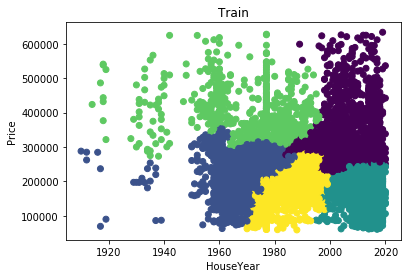

In [46]:
# Agglomerative Clustering

agglomerative_clustering_model = AgglomerativeClustering(n_clusters = 5)
train_cluster['cluster_year'] = agglomerative_clustering_model.fit_predict(
    train_cluster_scaled)

# Plot the result

plt.scatter(train_cluster['HouseYear'],
            train_cluster['Price'], c = train_cluster['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('Price')
plt.title('Train')

In [47]:
# Define function to add cluster year

def add_cluster_year(df):
    
    df_scaled = pd.DataFrame(scaler.fit_transform(
        df.loc[:, ['HouseYear']]), columns = ['HouseYear'])
    df['cluster_year'] = agglomerative_clustering_model.fit_predict(df_scaled)
    
    return df

In [48]:
# Define function to add mean prices by Rooms and by DistrictId

def add_mean_price(df, df_train = train_df):
    
    price = df_train['Price'].mean()
    price_mean_by_rooms = df_train.groupby(['Rooms'], as_index = False).agg({'Price': 'mean'}).\
        rename(columns = {'Price': 'mean_price_by_rooms'})

    price_mean_by_distr_rooms = df_train.groupby(['DistrictId', 'Rooms'], as_index = False).agg({'Price': 'mean'}).\
        rename(columns = {'Price': 'mean_price_dr'})

    df = pd.merge(df, price_mean_by_distr_rooms, on = [
                  'DistrictId', 'Rooms'], how = 'left')
    df = pd.merge(df, price_mean_by_rooms, on = 'Rooms', how = 'left')
    df['mean_price_dr'] = df['mean_price_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_dr'] = df['mean_price_dr'].fillna(price)
    df['mean_price_by_rooms'] = df['mean_price_by_rooms'].fillna(price)
    
    return df

In [49]:
# Define function to add district info

def add_distr_info(df):
    
    distr_info = df['DistrictId'].value_counts().reset_index().\
        rename(columns = {"index": "DistrictId", "DistrictId": 'large_district'})
    df = pd.merge(df, distr_info, on = 'DistrictId', how = 'left')
    df['large_district'] = df['large_district'].fillna(1)
    
    return df

---

## Building the Model <a class='anchor' id='model'>

To start with, we need to define the necessary functions for data preparation, testing out model and checking the deviation

In [60]:
def prep_data(df, df_train = train_df):
    df = df_square_m(df)
    df = df_houseyear(df)
    df = df_rooms(df)
    df = df_square(df)
    df = df_lifesquare(df)
    df = fill_lifesquare(df)
    df = del_missing(df)
    df = add_cluster_year(df)
    df = add_mean_price(df, df_train)
    df = add_distr_info(df)
    df = pd.get_dummies(df)
    df.drop('mean_square_per_room_in_dr', axis = 1, inplace = True)
    df.drop('mean_square_rooms_dr', axis = 1, inplace = True)
    optimizing_df(df)
    
    return df


def test_model(model, name, test, valid):
    model_pred = model.predict(test)
    r2 = r2_score(valid, model_pred)
    mse = mean_squared_error(valid, model_pred)
    plt.scatter(valid, (model_pred - valid))
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.title(name)
    plt.axhline(0, color = 'red')
    plt.show()


def model_top_deviation(model, test, valid):
    model_pred = model.predict(test)
    model_test = test.copy()
    model_test['Price'] = model_pred
    model_test['Price_test'] = valid
    model_test['SD'] = abs(model_test['Price']
                           - model_test['Price_test'])
    return model_test.nlargest(10, 'SD')

**Features**

In [57]:
features = list(train_df.loc[:, train_df.columns != 'Id'].corrwith(
    train_df['Price']).abs().sort_values(ascending = False)[1:].index)

target = 'Price'
models_dict = {}

**Train_test_split**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df[features], train_df[target], test_size = 0.3, random_state = 42)

In [61]:
# Apply prep_data

X_train = prep_data(X_train, train_df)
X_test = prep_data(X_test, train_df)

/Users/ilya.ivolgin/miniconda3/envs/day2/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/ilya.ivolgin/miniconda3/envs/day2/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 18 columns):
Rooms                  7000 non-null uint8
Square                 7000 non-null float32
DistrictId             7000 non-null uint8
Social_1               7000 non-null uint8
Helthcare_2            7000 non-null uint8
Social_2               7000 non-null uint16
Shops_1                7000 non-null uint8
Floor                  7000 non-null uint8
HouseFloor             7000 non-null uint8
LifeSquare             7000 non-null float32
Social_3               7000 non-null uint8
Ecology_1              7000 non-null float32
KitchenSquare          7000 non-null float32
HouseYear              7000 non-null uint16
cluster_year           7000 non-null uint8
mean_price_dr          7000 non-null float32
mean_price_by_rooms    7000 non-null float32
large_district         7000 non-null uint16
dtypes: float32(6), uint16(3), uint8(9)
memory usage: 321.3 KB


In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 18 columns):
Rooms                  3000 non-null uint8
Square                 3000 non-null float32
DistrictId             3000 non-null uint8
Social_1               3000 non-null uint8
Helthcare_2            3000 non-null uint8
Social_2               3000 non-null uint16
Shops_1                3000 non-null uint8
Floor                  3000 non-null uint8
HouseFloor             3000 non-null uint8
LifeSquare             3000 non-null float32
Social_3               3000 non-null uint8
Ecology_1              3000 non-null float32
KitchenSquare          3000 non-null float32
HouseYear              3000 non-null uint16
cluster_year           3000 non-null uint8
mean_price_dr          3000 non-null float32
mean_price_by_rooms    3000 non-null float32
large_district         3000 non-null uint16
dtypes: float32(6), uint16(3), uint8(9)
memory usage: 137.7 KB


## Linear Regression